<a href="https://colab.research.google.com/github/RAV10K1/DS-Unit-1-Sprint-1-Data-Wrangling-and-Storytelling/blob/master/LS_DS_114_Make_Explanatory_Visualizations_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Lambda School Data Science

*Unit 1, Sprint 1, Module 4*

---

# ASSIGNMENT

### 1) Replicate the lesson code. I recommend that you [do not copy-paste](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit).

Get caught up to where we got our example in class and then try and take things further. How close to "pixel perfect" can you make the lecture graph?

Once you have something that you're proud of, share your graph in the cohort channel and move on to the second exercise.

### 2) Reproduce another example from [FiveThityEight's shared data repository](https://data.fivethirtyeight.com/).

**WARNING**: There are a lot of very custom graphs and tables at the above link. I **highly** recommend not trying to reproduce any that look like a table of values or something really different from the graph types that we are already familiar with. Search through the posts until you find a graph type that you are more or less familiar with: histogram, bar chart, stacked bar chart, line chart, [seaborn relplot](https://seaborn.pydata.org/generated/seaborn.relplot.html), etc. Recreating some of the graphics that 538 uses would be a lot easier in Adobe photoshop/illustrator than with matplotlib. 

- If you put in some time to find a graph that looks "easy" to replicate you'll probably find that it's not as easy as you thought. 

- If you start with a graph that looks hard to replicate you'll probably run up against a brick wall and be disappointed with your afternoon.












# **1) Reproducing Lesson Code**

In [99]:
from IPython.display import display, Image

url = 'https://fivethirtyeight.com/wp-content/uploads/2017/09/mehtahickey-inconvenient-0830-1.png'
example = Image(url=url, width=400)

display(example)

In [0]:
# Your Work Here

# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [103]:
# Checking available styles in Seaborn & selecting appropriate style for the graphic
print(plt.style.available[0:10])
plt.style.use('fivethirtyeight')

['tableau-colorblind10', 'seaborn-muted', 'seaborn', 'dark_background', 'grayscale', 'seaborn-paper', 'seaborn-ticks', 'classic', 'seaborn-white', 'seaborn-bright']


In [105]:
# Reading data into Pandas
df = pd.read_csv('https://raw.githubusercontent.com/fivethirtyeight/data/master/inconvenient-sequel/ratings.csv')
df.head()

,timestamp,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
0,2017-07-17 12:28:32.785639,402,Males,http://www.imdb.com/title/tt6322922/ratings-male,4.6,5.0,2,197,7,7,3,7,7,11,8,20,135,49.0,1.7,1.7,0.7,1.7,1.7,2.7,2.0,5.0,33.6
1,2017-07-17 12:28:33.025600,78,Females,http://www.imdb.com/title/tt6322922/ratings-fe...,6.9,7.7,10,16,1,0,1,1,0,3,4,3,49,20.5,1.3,0.0,1.3,1.3,0.0,3.8,5.1,3.8,62.8
2,2017-07-17 12:28:33.273919,4,Aged under 18,http://www.imdb.com/title/tt6322922/ratings-age_1,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
3,2017-07-17 12:28:33.495325,4,Males under 18,http://www.imdb.com/title/tt6322922/ratings-ma...,4.2,4.2,3,2,0,0,0,1,0,0,0,0,1,50.0,0.0,0.0,0.0,25.0,0.0,0.0,0.0,0.0,25.0
4,2017-07-17 12:28:33.722849,130,Aged 18-29,http://www.imdb.com/title/tt6322922/ratings-age_2,6.3,6.5,9,41,0,3,1,2,3,6,4,6,64,31.5,0.0,2.3,0.8,1.5,2.3,4.6,3.1,4.6,49.2


In [0]:
# Converting timestamps strings to datetime objects
df['timestamp'] = pd.to_datetime(df['timestamp'])

In [0]:
# Assigning timestamp as unique identifier
df.set_index('timestamp', inplace=True)

In [109]:
df.tail()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 23:10:05.369510,8,IMDb staff,http://www.imdb.com/title/tt6322922/ratings-im...,8.4,7.2,8,1,0,0,0,0,1,1,2,2,1,12.5,0.0,0.0,0.0,0.0,12.5,12.5,25.0,25.0,12.5
2017-08-29 23:10:05.598331,41,Top 1000 voters,http://www.imdb.com/title/tt6322922/ratings-to...,4.6,4.7,5,11,4,2,2,5,4,5,1,1,6,26.8,9.8,4.9,4.9,12.2,9.8,12.2,2.4,2.4,14.6
2017-08-29 23:10:05.794141,925,US users,http://www.imdb.com/title/tt6322922/ratings-usa,4.8,5.0,4,405,34,20,8,9,30,54,46,60,259,43.8,3.7,2.2,0.9,1.0,3.2,5.8,5.0,6.5,28.0
2017-08-29 23:10:06.022268,565,Non-US users,http://www.imdb.com/title/tt6322922/ratings-in...,6.4,6.5,7,129,11,10,8,32,47,52,37,35,204,22.8,1.9,1.8,1.4,5.7,8.3,9.2,6.5,6.2,36.1
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [0]:
# Filtering for last day
last_day = df['2017-08-29']

In [111]:
# Getting demographic breakdown for all IMDB users
last_day_filtered = last_day[last_day['category']=='IMDb users']
last_day_filtered.tail()

,respondents,category,link,average,mean,median,1_votes,2_votes,3_votes,4_votes,5_votes,6_votes,7_votes,8_votes,9_votes,10_votes,1_pct,2_pct,3_pct,4_pct,5_pct,6_pct,7_pct,8_pct,9_pct,10_pct
timestamp,,,,,,,,,,,,,,,,,,,,,,,,,,
2017-08-29 22:30:06.423181,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:40:06.233659,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 22:50:06.592571,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:00:05.829558,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7
2017-08-29 23:10:06.218251,2662,IMDb users,http://www.imdb.com/title/tt6322922/ratings,5.4,5.6,7,1021,69,38,25,55,110,154,147,146,897,38.4,2.6,1.4,0.9,2.1,4.1,5.8,5.5,5.5,33.7


In [114]:
# Getting last row of data
final = last_day_filtered.tail(1)
final.T

timestamp,2017-08-29 23:10:06.218251
respondents,2662
category,IMDb users
link,http://www.imdb.com/title/tt6322922/ratings
average,5.4
mean,5.6
median,7
1_votes,1021
2_votes,69
3_votes,38
4_votes,25


In [115]:
# Getting Percentage Columns
pct_columns = ['1_pct', '2_pct', '3_pct', '4_pct', '5_pct',
               '6_pct', '7_pct', '8_pct', '9_pct', '10_pct']

final[pct_columns].T

timestamp,2017-08-29 23:10:06.218251
1_pct,38.4
2_pct,2.6
3_pct,1.4
4_pct,0.9
5_pct,2.1
6_pct,4.1
7_pct,5.8
8_pct,5.5
9_pct,5.5
10_pct,33.7


In [116]:
# Resetting Index and renaming labels
plot_data = final[pct_columns].T
plot_data.index = range(1,11)
plot_data.columns = ['percent']
plot_data

,percent
1,38.4
2,2.6
3,1.4
4,0.9
5,2.1
6,4.1
7,5.8
8,5.5
9,5.5
10,33.7


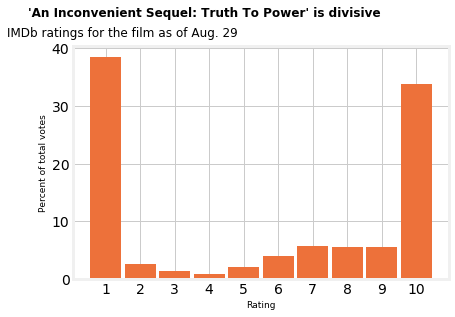

In [117]:
fig, ax = plt.subplots()

# Figure background color
fig.patch.set(facecolor="white")

# Set the bars
ax.bar(x=range(1,11), height=plot_data['percent'], width=0.9, color="#ED713A")

# Axes background color
ax.set(facecolor="white")

# Set the title and subtitle
ax.set_title("'An Inconvenient Sequel: Truth To Power' is divisive", 
             fontsize=12, 
             x=.35, 
             y=1.1,
             fontweight='bold')
ax.text(s="IMDb ratings for the film as of Aug. 29", fontsize=12, x=-1.85, y=42)

# Set the x and y axes labels
ax.set_xlabel("Rating", fontsize=9)
ax.set_ylabel("Percent of total votes", fontsize=9)

# Fix the x an y axis tick marks and grid
ax.set_xticklabels(range(1,11), rotation=0)
ax.set_xticks(range(1,11))
ax.set_yticklabels(range(0,50,10))
ax.set_yticks(range(0,50,10));

# 2) Reproducing another example from FiveThityEight's shared data repository.

In [262]:
# Obtaining image from website

url1 = 'https://fivethirtyeight.com/wp-content/uploads/2015/11/bialik-datalab-parisattacks-11.png?w=1150'
example1 = Image(url=url1, width=400)

display(example1)

In [263]:
# Downloading file from website
!wget https://projects.fivethirtyeight.com/data-webpage-data/datasets/terrorism.zip

--2020-01-24 04:21:37--  https://projects.fivethirtyeight.com/data-webpage-data/datasets/terrorism.zip
Resolving projects.fivethirtyeight.com (projects.fivethirtyeight.com)... 151.101.2.109, 151.101.66.109, 151.101.130.109, ...
Connecting to projects.fivethirtyeight.com (projects.fivethirtyeight.com)|151.101.2.109|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 906227 (885K) [application/zip]
Saving to: ‘terrorism.zip.2’

terrorism.zip.2     100%[===================>] 884.99K  --.-KB/s    in 0.09s   

2020-01-24 04:21:37 (9.66 MB/s) - ‘terrorism.zip.2’ saved [906227/906227]



In [264]:
%cd/content/sample_data

/content/sample_data


In [0]:
# Unzipping file
from zipfile import ZipFile
import zipfile

zipfilePath = ('/content/terrorism.zip')
zip = zipfile.ZipFile(zipfilePath)
zip.extractall(".")
zip.close()

In [0]:
# Loading data into dataframes
fr_ft_yr = pd.read_csv('/content/sample_data/terrorism/france_terrorism_fatalities_by_year.csv')
eu_ft_yr = pd.read_csv('/content/sample_data/terrorism/eu_terrorism_fatalities_by_year.csv')
eu_ft_cy = pd.read_csv('/content/sample_data/terrorism/eu_terrorism_fatalities_by_country.csv')

In [267]:
# Checking data frames
fr_ft_yr.head()

,iyear,fatalities
0,2014,1
1,2013,0
2,2012,8
3,2011,0
4,2010,0


In [268]:
eu_ft_yr.head()

,iyear,fatalities
0,2014,5
1,2013,6
2,2012,10
3,2011,4
4,2010,4


In [269]:
eu_ft_cy.head()

,iyear,Belgium,Denmark,France,Germany,Greece,Ireland,Italy,Luxembourg,Netherlands,Portugal,Spain,United Kingdom
0,1970,0,0,0,0,2,1,0,0,0,0,0,20
1,1971,0,0,0,0,0,1,0,0,0,0,0,110
2,1972,0,0,1,0,0,6,1,0,0,0,2,368
3,1973,0,0,5,0,5,4,62,0,1,0,6,210
4,1974,0,0,3,0,92,34,26,0,1,0,19,234


In [270]:
# Creating New Data frame by merging France fatalities-by-year data with EU fatalities-by-year data

df = pd.merge(fr_ft_yr,eu_ft_yr, how='inner', on='iyear')
df.head()

,iyear,fatalities_x,fatalities_y
0,2014,1,5
1,2013,0,6
2,2012,8,10
3,2011,0,4
4,2010,0,4


In [271]:
eu_ft_yr

,iyear,fatalities
0,2014,5
1,2013,6
2,2012,10
3,2011,4
4,2010,4
5,2009,14
6,2008,3
7,2007,8
8,2006,6
9,2005,60


In [272]:
fr_ft_yr

,iyear,fatalities
0,2014,1
1,2013,0
2,2012,8
3,2011,0
4,2010,0
5,2009,0
6,2008,0
7,2007,3
8,2006,1
9,2005,0


In [0]:
# Obtaining data subset for Years 1970 to 2014 for all EU countries including France
df3 = eu_ft_cy.sort_values(by='iyear')
df4 = df3.iloc[0:15,:]
df4 = df4.sort_values(by='iyear', ascending=False)

In [274]:
# Dropping France Data to get values for rest of EU
df4 = df4.drop('France', axis=1)
df4

,iyear,Belgium,Denmark,Germany,Greece,Ireland,Italy,Luxembourg,Netherlands,Portugal,Spain,United Kingdom
14,1984,0,0,0,5,1,23,0,0,3,51,69
13,1983,2,0,0,4,5,2,0,0,8,42,77
12,1982,0,0,0,2,2,12,0,0,3,42,95
11,1981,6,0,0,3,2,24,0,0,2,39,86
10,1980,2,0,0,5,12,125,0,0,3,116,115
9,1979,1,0,0,1,9,24,0,3,3,112,133
8,1978,1,0,0,0,1,21,0,1,0,84,81
7,1977,0,0,0,1,2,25,0,9,0,44,103
6,1976,0,0,0,14,5,10,0,0,3,17,264
5,1975,0,0,0,1,7,0,0,4,0,31,245


In [275]:
# Temporarily removing iyear column to calculate country aggregate figures for EU figure
df5 = df4.drop('iyear', axis=1)
df5['European Union'] = df5.sum(axis=1)
df5 

,Belgium,Denmark,Germany,Greece,Ireland,Italy,Luxembourg,Netherlands,Portugal,Spain,United Kingdom,European Union
14,0,0,0,5,1,23,0,0,3,51,69,152
13,2,0,0,4,5,2,0,0,8,42,77,140
12,0,0,0,2,2,12,0,0,3,42,95,156
11,6,0,0,3,2,24,0,0,2,39,86,162
10,2,0,0,5,12,125,0,0,3,116,115,378
9,1,0,0,1,9,24,0,3,3,112,133,286
8,1,0,0,0,1,21,0,1,0,84,81,189
7,0,0,0,1,2,25,0,9,0,44,103,184
6,0,0,0,14,5,10,0,0,3,17,264,313
5,0,0,0,1,7,0,0,4,0,31,245,288


In [0]:
# Creating Separate List for Iyear
year_list = df4['iyear']

In [0]:
# Reinserting Year Column to Dataframe 
df5['iyear'] = year_list
cols = df5.columns.to_list()

In [278]:
df2 = pd.merge(df1, eu_ft_cy, how='inner', on='iyear')
df2 = df2.sort_values(by='iyear', ascending=True)
print(df2)

    iyear  Belgium_x  Denmark_x  ...  Portugal_y  Spain_y  United Kingdom_y
0    1986          0          0  ...           1       57                63
1    1987          1          0  ...           0       64               104
2    1988          1          0  ...           2       25               372
3    1989          4          0  ...           1       29                66
4    1990          2          0  ...           0       32                77
5    1991          1          0  ...           0       46                88
6    1992          1          1  ...           0       29                94
7    1993          2          0  ...           0       19                 3
8    1994          0          0  ...           2       17                66
9    1995          0          0  ...           0       18                11
10   1996          0          0  ...           0        5                15
11   1997          4          0  ...           0       11                23
12   1998   

In [279]:
print(eu_ft_cy)

    iyear  Belgium  Denmark  ...  Portugal  Spain  United Kingdom
0    1970        0        0  ...         0      0              20
1    1971        0        0  ...         0      0             110
2    1972        0        0  ...         0      2             368
3    1973        0        0  ...         0      6             210
4    1974        0        0  ...         0     19             234
5    1975        0        0  ...         0     31             245
6    1976        0        0  ...         3     17             264
7    1977        0        0  ...         0     44             103
8    1978        1        0  ...         0     84              81
9    1979        1        0  ...         3    112             133
10   1980        2        0  ...         3    116             115
11   1981        6        0  ...         2     39              86
12   1982        0        0  ...         3     42              95
13   1983        2        0  ...         8     42              77
14   1984 

In [0]:
# Renaming Columns in data frame
# df.rename(columns={'iyear':'Year', 'fatalities_x':'France', 'fatalities_y':'European Union'}, inplace=True)
# df.head()

# STRETCH OPTIONS

### 1) Reproduce one of the following using the matplotlib or seaborn libraries:

- [thanksgiving-2015](https://fivethirtyeight.com/features/heres-what-your-part-of-america-eats-on-thanksgiving/) 
- [candy-power-ranking](https://fivethirtyeight.com/features/the-ultimate-halloween-candy-power-ranking/) 
- or another example of your choice!

### 2) Make more charts!

Choose a chart you want to make, from [Visual Vocabulary - Vega Edition](http://ft.com/vocabulary).

Find the chart in an example gallery of a Python data visualization library:
- [Seaborn](http://seaborn.pydata.org/examples/index.html)
- [Altair](https://altair-viz.github.io/gallery/index.html)
- [Matplotlib](https://matplotlib.org/gallery.html)
- [Pandas](https://pandas.pydata.org/pandas-docs/stable/visualization.html)

Reproduce the chart. [Optionally, try the "Ben Franklin Method."](https://docs.google.com/document/d/1ubOw9B3Hfip27hF2ZFnW3a3z9xAgrUDRReOEo-FHCVs/edit) If you want, experiment and make changes.

Take notes. Consider sharing your work with your cohort!

In [0]:
# More Work Here